In [77]:
indi = 'PRR'

In [78]:
import pandas as pd
import numpy as np

kospi = pd.read_csv("./kospi(18~22).csv")
kospi = kospi[['회사명', '회계년도',indi, '수익률']]
kospi = kospi.replace([np.inf, -np.inf], 0)
kospi

,회사명,회계년도,PRR,수익률
0,DB하이텍,2018,-0.187528,-3.046683
1,DB하이텍,2019,-0.185292,-0.812721
2,DB하이텍,2020,-0.182456,6.076923
3,DB하이텍,2021,-0.180473,17.607656
4,DB하이텍,2022,-0.185392,2.720971
...,...,...,...,...
2515,효성티앤씨,2022,-0.176832,-1.711470
2516,효성화학,2020,-0.184854,-4.034247
2517,효성화학,2021,-0.181470,24.213548
2518,흥아해운,2021,-0.189092,0.000000


In [79]:
PER_list = [pd.DataFrame() for _ in range(6)]

for i, (year, group_df) in enumerate(kospi.groupby('회계년도')):
    sorted_df = group_df.sort_values(indi, ascending=False)
    PER_list[i] = sorted_df  # sorted_df를 momentum_list에 추가
    # print(f"---- {year} ----")
    # print(sorted_df)
print(PER_list)

[           회사명  회계년도       PRR        수익률
313       비지에프  2018  8.374084  -7.562142
33        강원랜드  2018  8.374084  -2.379679
2111  케이피엑스케미칼  2018  8.374084   0.115321
1525     사조동아원  2018  8.374084  -1.151515
449    신세계아이앤씨  2018  8.374084  14.285714
...        ...   ...       ...        ...
1827   에스케이디앤디  2018 -0.189092  -0.268007
1016     현대홈쇼핑  2018 -0.189092  -1.547619
1013     현대퓨처넷  2018 -0.189092   1.460957
992         한화  2018 -0.189092   0.839161
1217      남해화학  2018 -0.189092   5.133038

[483 rows x 4 columns],            회사명  회계년도       PRR       수익률
1179  그랜드코리아레저  2019  8.374084 -1.691176
1597      삼영무역  2019  8.374084 -0.603960
2122      코스맥스  2019  8.374084  0.439221
34        강원랜드  2019  8.374084  1.105263
1230       넷마블  2019  8.374084 -2.158730
...        ...   ...       ...       ...
1721     신세계건설  2019 -0.189092 -1.085044
1727      신일전자  2019 -0.189092  2.005988
836     코리아써키트  2019 -0.189092 -3.068720
827    케이티아이에스  2019 -0.189092 -0.729537
1223       네이버  201

In [80]:
return_mean = [pd.DataFrame() for _ in range(5)]

for i in range(5):
    PER_list[i]['quantile'] = pd.qcut(PER_list[i][indi], 5, labels=False, duplicates='drop')
    quantile_means = PER_list[i].groupby('quantile')['수익률'].mean()
    return_mean[i] = quantile_means
    print(quantile_means)

quantile
0    0.788248
1    1.198545
2    1.577233
3    0.474448
Name: 수익률, dtype: float64
quantile
0   -0.372257
1   -0.841623
2   -0.349603
3    0.140404
Name: 수익률, dtype: float64
quantile
0   -2.827472
1   -2.913314
2   -3.260925
3   -2.537792
Name: 수익률, dtype: float64
quantile
0     9.276610
1    10.789193
2    11.936558
3     9.148455
Name: 수익률, dtype: float64
quantile
0    0.939477
1   -0.256371
2    0.978533
3    1.498080
Name: 수익률, dtype: float64


In [81]:
re = pd.concat([return_mean[0],return_mean[1],return_mean[2],return_mean[3],return_mean[4]], axis=1)
re.columns = ['2016', '2017', '2018', '2019', '2020']
re

,2016,2017,2018,2019,2020
quantile,,,,,
0,0.788248,-0.372257,-2.827472,9.276610,0.939477
1,1.198545,-0.841623,-2.913314,10.789193,-0.256371
2,1.577233,-0.349603,-3.260925,11.936558,0.978533
3,0.474448,0.140404,-2.537792,9.148455,1.498080


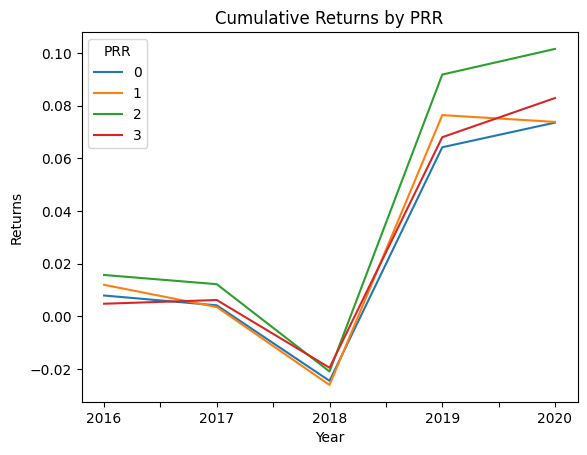

In [82]:
import matplotlib.pyplot as plt
# 누적 수익률 계산
re_tran = re.transpose()  # Assume that these are returns
re_tran

re_tran = np.log(1+re_tran/100).cumsum()

# 그래프 그리기
re_tran.plot()
plt.xlabel('Year')
plt.ylabel('Returns')
plt.title('Cumulative Returns by '+indi)
plt.legend(title=indi)
plt.show()